In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pylab as plt 
from plotly.subplots import make_subplots

/home/mert/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/mert/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/mert/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data = pd.read_csv("/home/mert/Desktop/MLOPS/bitcoin-forecast/data/raw/btc_usd.csv")
btc_vwap = data["btc_vwap"].values
btc_timestamp = data["btc_timestamp"].values
data['btc_timestamp'] = pd.to_datetime(data['btc_timestamp'])

In [3]:
btc_vwap  = 'btc_vwap'
btc_open  = 'btc_open'
btc_close = 'btc_close'
btc_high  = 'btc_high'
btc_low   = 'btc_low'

colors = ['royalblue', 'limegreen', 'red', 'orangered', 'mediumpurple']

fig = px.line(data, x='btc_timestamp', y=[btc_vwap, btc_open, btc_close, btc_high, btc_low],
              labels={'btc_timestamp': 'Date', btc_vwap: 'BTC VWAP', btc_open: 'BTC Open', btc_close: 'BTC Close', btc_high : 'BTC high', btc_low : 'BTC low'},
              line_shape='linear')

for col, color in zip(data.columns[1:], colors):
    fig.update_traces(line=dict(color=color), selector=dict(name=col))

fig.update_layout(title='BTC VWAP, Open, Close, High, and Low Time Series',
                  xaxis_title='Date', yaxis_title='BTC Values',
                  xaxis=dict(tickmode='linear', tick0=0, dtick='M3', tickformat='%Y-%m-%d'))
fig.show()

/home/mert/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [4]:
data = pd.read_csv("/home/mert/Desktop/MLOPS/bitcoin-forecast/data/external/btc_usd_features.csv")

In [5]:
fig_box_months = px.box(data, x='month', y='btc_vwap_org', color='month',
                        title='Relationship between Months and btc_vwap_org',
                        labels={'btc_vwap_org': 'btc_vwap_org', 'month': 'Month'})

fig_violin_months = px.violin(data, x='month', y='btc_vwap_org', color='month',
                              box=True, title='Relationship between Months and btc_vwap_org',
                              labels={'btc_vwap_org': 'btc_vwap_org', 'month': 'Month'})

fig_months = make_subplots(rows=2, cols=1,
                           subplot_titles=['Box Plot', 'Violin Plot'],
                           shared_xaxes=True,
                           vertical_spacing=0.1)

for trace in fig_box_months['data']:
    fig_months.add_trace(trace, row=1, col=1)

for trace in fig_violin_months['data']:
    fig_months.add_trace(trace, row=2, col=1)

fig_months.update_layout(showlegend=False, height=600, title_text='Relationship between Months and btc_vwap_org')
fig_months.show()

/home/mert/.local/lib/python3.10/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/mert/.local/lib/python3.10/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [6]:
fig_box = px.box(data, x='weekday', y='btc_vwap_org', color='weekday',
                 title='The Relationship between Days and btc_vwap_org',
                 labels={'btc_vwap_org': 'btc_vwap_org', 'weekday': 'Weekday'})

fig_violin = px.violin(data, x='weekday', y='btc_vwap_org', color='weekday',
                       box=True, title='The Relationship between Days and btc_vwap_org',
                       labels={'btc_vwap_org': 'btc_vwap_org', 'weekday': 'Weekday'})

fig_days = make_subplots(rows=2, cols=1,
                         subplot_titles=['Box Plot', 'Violin Plot'],
                         shared_xaxes=True,
                         vertical_spacing=0.15)

for trace in fig_box['data']:
    fig_days.add_trace(trace, row=1, col=1)

for trace in fig_violin['data']:
    fig_days.add_trace(trace, row=2, col=1)

fig_days.update_layout(showlegend=False, height=600, title_text='Relationship between Days and btc_vwap_org')
fig_days.show()

/home/mert/.local/lib/python3.10/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/mert/.local/lib/python3.10/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [7]:
data['season_'] = data['month'].map(lambda x: 'winter' if x in [12, 1, 2] else ('spring' if x in [3, 4, 5] else ('summer' if x in [6, 7, 8] else 'falls')))
dum = data.groupby(['year', 'season_'])['btc_vwap_org'].mean().reset_index()

fig = px.bar(dum, x='year', y='btc_vwap_org', color='season_', title='Seasonal Average btc_vwap by Year')
fig.update_layout(legend=dict(x=1, y=1))
fig.show()

/home/mert/.local/lib/python3.10/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



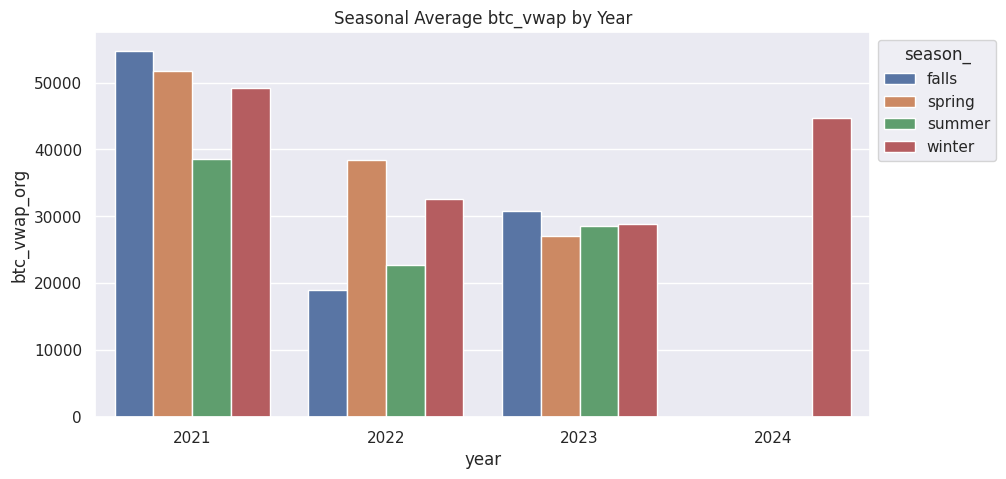

In [8]:
dum=data.groupby(['year','season_'])['btc_vwap_org'].mean().reset_index()
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.barplot(x='year',y='btc_vwap_org',hue='season_',data=dum)
ax.set_title('Seasonal Average btc_vwap by Year')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
data = data.drop('season_', axis=1)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



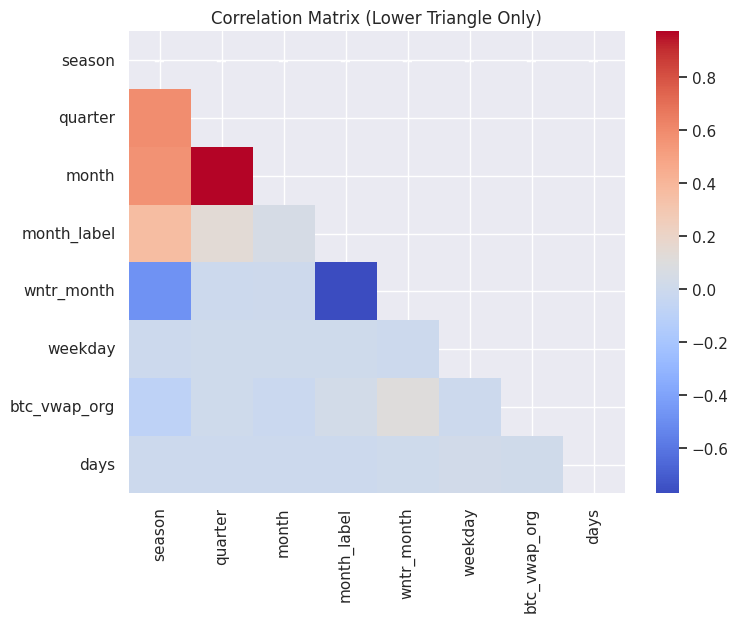

In [9]:
selected_columns = ['season', 'quarter', 'month', 'month_label', 'wntr_month', 'weekday', 'btc_vwap_org', 'days']
correlation_matrix = data[selected_columns].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', mask=mask)
plt.title('Correlation Matrix (Lower Triangle Only)')
plt.show()